# Tutorial 3: Machine Learning and Image Data

Previously, we applied machine learning to stroke risk data using random forests. We got some pretty good results! 

You may be wondering, however -- how do we apply these machine learning methods to the medical imaging data we know and love? At first glance, images seem more complex then the list of stroke predictors we looked at before. Pixels (and voxels) have scalar values, like the list of stroke predictors, but they also have spatial relationships that affect their interpretation. For example, a data point in a image may be significant because it is valued very highly (bright), or it may be significant because of its differences from neighboring voxels (contrast). How can we process this new relationship with the methods we've already encountered?

The answer, in short, is to reformat our image data so that it is more similar to the vectorized stroke data we dealt with previously. In this tutorial, we will show you how you can do that quite simply with small images by "flattening" an image into a vectorized state. We will also show that this basicmethod quickly becomes impractical with large images, and start to discuss how neural networks overcome this problem with the help of _convolutional filters_ over images.

To get started, we're first going to load a very small image of the number "4".

In [1]:
!wget -O mnist_sample.png https://github.com/QTIM-Lab/qtim_Tutorials/blob/master/tutorial_3/mnist_sample.png?raw=true
!wget -O mnist_sample_2.png https://github.com/QTIM-Lab/qtim_Tutorials/blob/master/tutorial_3/mnist_sample_2.png?raw=true
!wget -O mnist_glossary.png https://github.com/QTIM-Lab/qtim_Tutorials/blob/master/tutorial_3/mnist_glossary.png?raw=true

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


(-0.5, 27.5, 27.5, -0.5)

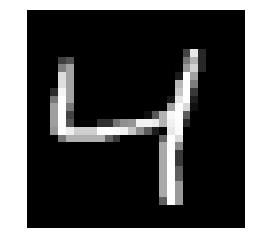

In [3]:
from PIL import Image
import matplotlib.pyplot as plt  # another common abbreviation
%matplotlib inline
import numpy as np  # common abbreviation

img = Image.open('mnist_sample.png')
img_arr = np.asarray(img)
plt.imshow(img_arr, cmap='gray')
plt.axis('off')

Pretty small! Let's check the size of that image.

In [4]:
print(img_arr.shape)

(28, 28)


Only 28x28, or 784 pixels. Far smaller than most images we deal with in the real world, but a good starting point for today's tutorial. Let's bring up a second image, and use matplotlib's subplot feature to compare the two.

(-0.5, 27.5, 27.5, -0.5)

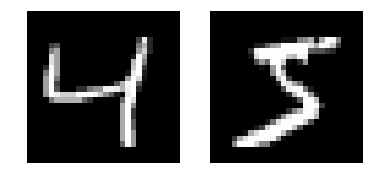

In [5]:
img_2 = Image.open('mnist_sample_2.png')
img_arr_2 = np.asarray(img_2)

plt.subplot(1, 2, 1)  # total rows, total columns, position (row*column)
plt.imshow(img_arr, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_arr_2, cmap='gray')
plt.axis('off')

A 4 and a 5 -- quite interesting! Here is today's challenge: how can you use an algorithm to tell whether a picture is a picture of a "4" or a picture of a "5"? Or, maybe, for that matter, a picture of a "3"? This problem of differentiating between different pictures of handwritten digits is a common benchmarking problem in computer vision, and its trained on a datset known as the MNIST dataset.

![ML](mnist_glossary.png)

Telling the difference between the rows of handwritten digits above is easy for a human being, but creating an algorithm to do so in the context of a program is not necessarily obvious. We'll start with the simplest possible method, which is to _flatten_ an image into a vectorized state, and then run a machine learning algorithm we're familiar with on it. Let's get started.

In [7]:
# We flatten our image by using numpy's "reshape" function to make it a 1 x (height * width) array.
print(img_arr.shape)
img_flattened = np.reshape(img_arr, (1, 784)) # 28x28 = 784
print(img_flattened.shape)

(28, 28)
(1, 784)


So what does that look like..

(-0.5, 783.5, 0.5, -0.5)

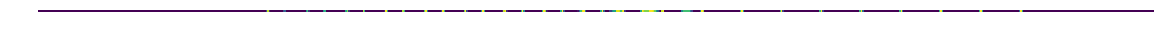

In [9]:
plt.figure(figsize = (20,1))
plt.imshow(img_flattened)
plt.axis('off')

Not very helpful -- let's try looking at just one segment.

(-0.5, 99.5, 0.5, -0.5)

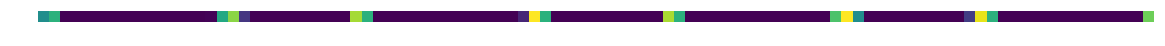

In [10]:
shortened_img_flattened = img_flattened[:, 200:300]
plt.figure(figsize = (20,1))
plt.imshow(shortened_img_flattened)
plt.axis('off')

Weird! Let's see how that compares to our old friend "5".

(-0.5, 99.5, 0.5, -0.5)

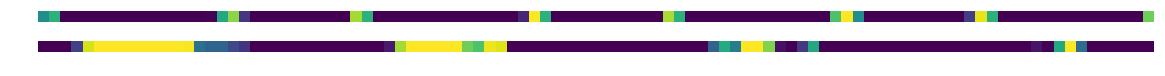

In [11]:
img_flattened_2 = np.reshape(img_arr_2, (1, 784)) # 28x28 = 784
shortened_img_flattened_2 = img_flattened_2[:, 200:300]

plt.figure(figsize = (20,1))
plt.imshow(shortened_img_flattened, interpolation='none')
plt.axis('off')
plt.subplot(2, 1, 1)  # total rows, total columns, position (row*column)
plt.imshow(shortened_img_flattened)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(shortened_img_flattened_2)
plt.axis('off')

Interesting -- it seems like there might be something there. There are high values on the "5" where there are low values on the "4", and vice-versa. Much like how the random forest identified risk factors in the stroke dataset, a random forest can also identify these informative pixels that may lead to a classification of an image as a "4" or a "5".

To train an algorithm to separate these 4s and 5s, we will need a lot of images. We _could_ write some code to download a massive dataset of images of 4s and 5s from the internet, flatten those images individually, and concatenate each flattened image into a new row of a pandas array. Lord knows that if you continue in data science, you will have to write code like that, but today, thankfully, someone else has done the hard work for you. In this case, you'll simply need to load a dataset we've attached to this lesson called "mnist.csv".

In [13]:
!wget -O mnist.csv https://www.dropbox.com/s/zzltdvylq6sj25j/mnist.csv?dl=1
import pandas as pd  # common abbreviation
data = pd.read_csv('mnist.csv')  # load the comma separated value (CSV) file
data.head(10)  # show the first n rows of this file

'wget' is not recognized as an internal or external command,
operable program or batch file.


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It's kind of looking like the diabetes dataset now! For fun and knowledge, let's visualize some of the data like we did above.

C:\Users\jxb29\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


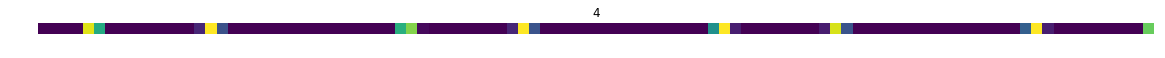

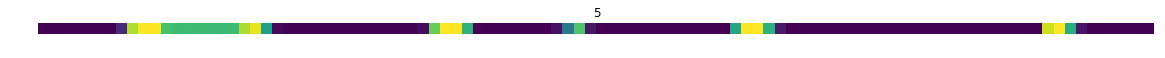

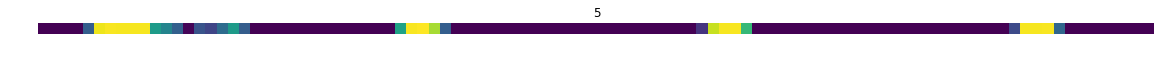

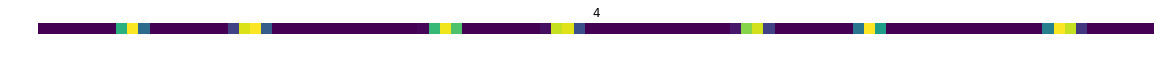

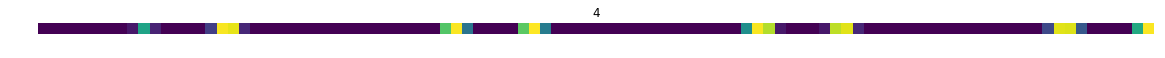

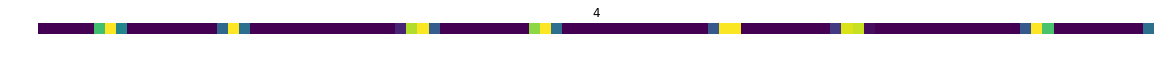

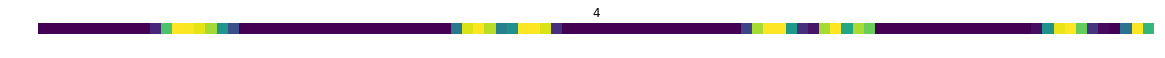

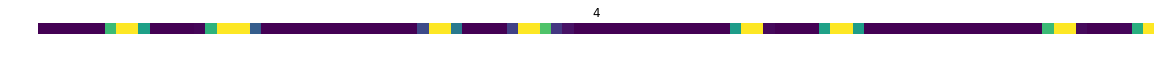

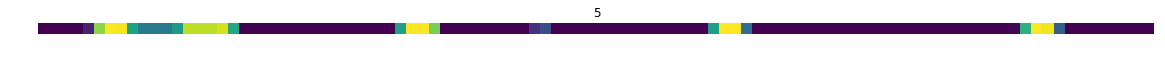

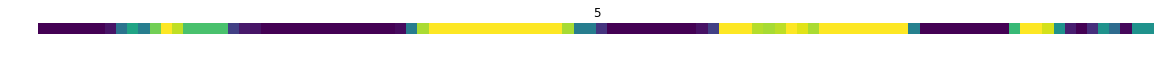

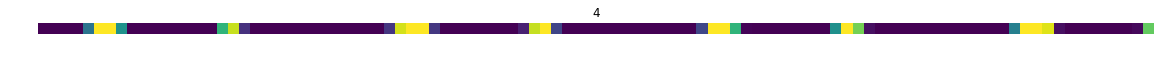

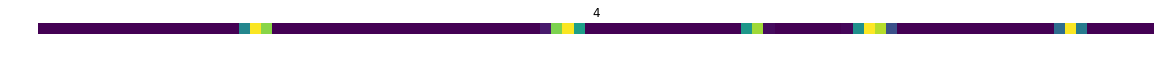

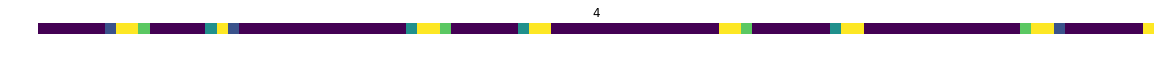

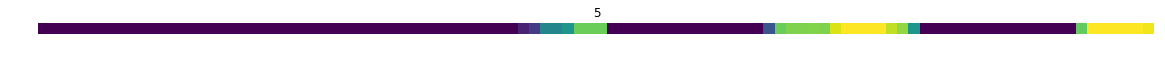

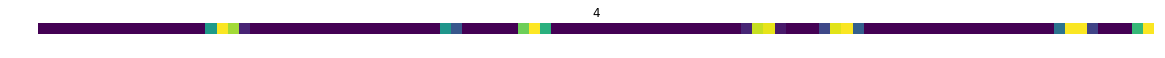

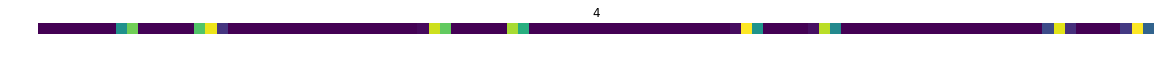

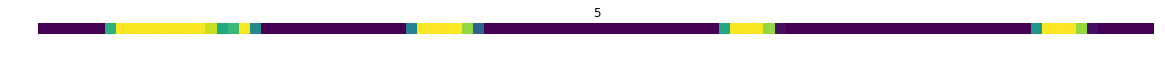

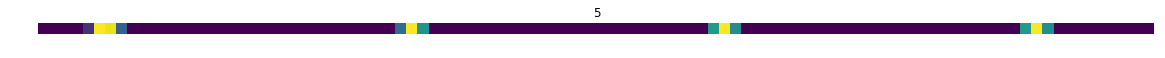

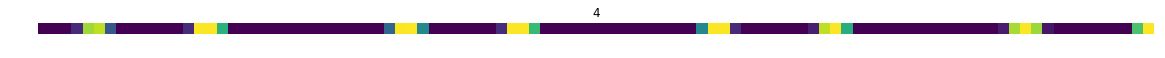

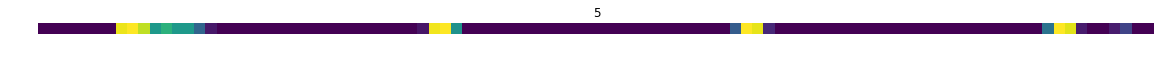

In [14]:
for i in range(20):  
    plt.figure(figsize = (20,20))    
    plt.subplot(20, 1, i+1)  # total rows, total columns, position (row*column)
    plt.imshow(data.iloc[i, 200:300].reshape(1,100))
    plt.axis('off')
    plt.title(str(data.label[i]))

Hmmm... Looks like there might be a pattern there. I wonder if we can use the visualization method we used for the stroke data? Let's give it a shot. 

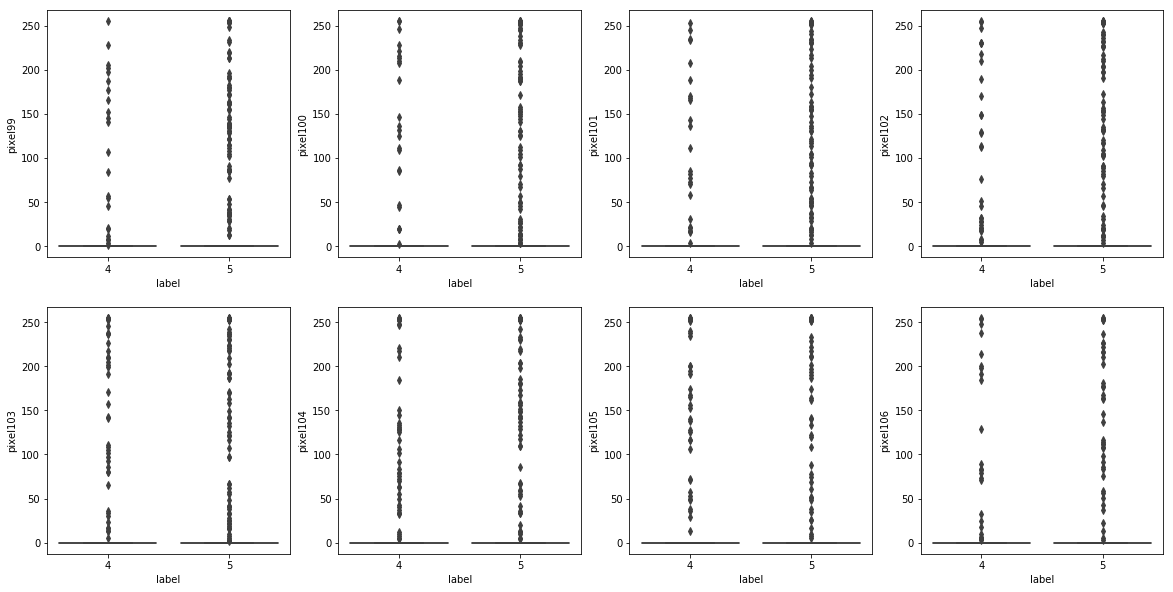

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]

import seaborn as sns
sns.set_style('white')

for i, column in enumerate(data.columns[100:108]):  
    
    plt.subplot(2, 4, i+1)  # total rows, total columns, position (row*column)
    box = sns.boxplot(x='label', y=column, data=data)

Weird! And not very helpful. Most of the time, pixel values are zero, so a boxplot median and upper and lower quartiles will all be zero. I wonder.. could a random forest still learn? Let's recycle our code from last time.

In [16]:
pixel_variables = data.columns[1:] # Instead of clinical_variables, we have pixel_variables. They are all columns except the first row.

from sklearn.cross_validation import train_test_split

# Note: these are not great variable names, but very common in mathematical notation
# Capital letter: matrix, lower-case letter: vector
X_train, X_test, y_train, y_test = train_test_split(data[pixel_variables], data['label'], train_size=0.8, test_size=0.2)

# How many cases do we have?
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6293, 784) (6293,)
(1574, 784) (1574,)


C:\Users\jxb29\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# Let's train our random forest!
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [18]:
# How does it do?
from sklearn.metrics import accuracy_score, classification_report

# Training data
print('Accuracy on training data:', accuracy_score(y_train, clf.predict(X_train)))

# Testing...
print('Accuracy on testing data:', accuracy_score(y_test, clf.predict(X_test)))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9714104193138501


Looks like it does pretty well -- 98%! It turns out computer vision isn't that hard after all. However, we're only able to get this result because we are dealing with 28x28 images. Particularly, because these images have only 784 variables, we are able to relatively easily create a dataset where we have more samples than variables. Real images, however, can be much larger. A 1000x1000 pixel image will have 1,000,000 separate variables to regress over, which is often much larger than the number of samples we can acquire. An MRI image is often on the order of 150x150x225 if in isotropic resolution, which gives about 5 million variable!

# Bonus: neural network!

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(32, 32))
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
print('Accuracy on training data:', accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy on testing data:', accuracy_score(y_test, clf.predict(X_test)))

Accuracy on training data: 0.9984109327824567
Accuracy on testing data: 0.9911054637865311
